In [ ]:
!pip install langchain langchain-google-genai langchain_core diffusers numpy torch transformers xformers accelerate controlnet_aux

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


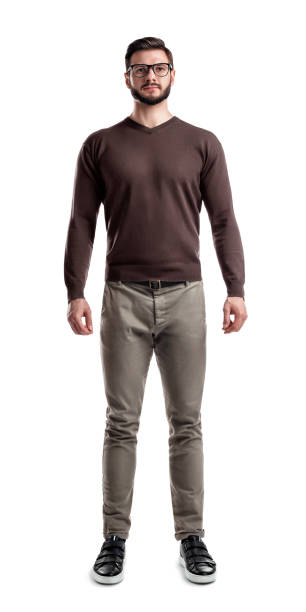

In [ ]:
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
import urllib.request
from io import BytesIO
import cv2
from PIL import Image
import numpy as np
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
from diffusers import UniPCMultistepScheduler



def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid



urllib.request.urlretrieve(
  'https://media.istockphoto.com/id/965662288/photo/a-young-bearded-man-in-casual-wear-stands-with-hands-on-his-sides-on-a-white-background.jpg?s=612x612&w=0&k=20&c=QNRZO_MJP-hANRVdtyJ3OeVx30JM5IDrCjPwLbw8NjQ=',
  "reference.jpg")

image = Image.open("reference.jpg")
ogImage = image
ogImage


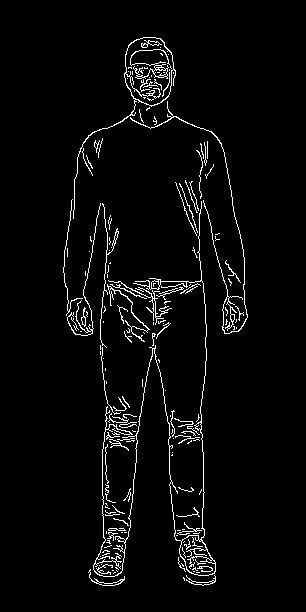

In [ ]:
image = np.array(image)
low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

hand_pose_model.pth:   0%|          | 0.00/147M [00:00<?, ?B/s]

facenet.pth:   0%|          | 0.00/154M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/controlnet_aux/open_pose/body.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = util.transfer(self.model, torch.load(

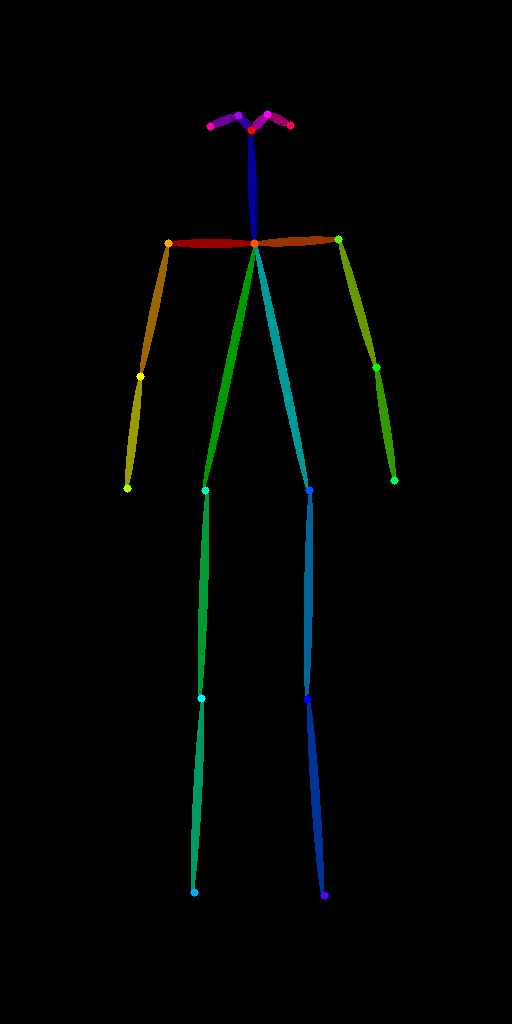

In [ ]:
controlnet = ControlNetModel.from_pretrained("fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float32)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float32
)
pipe = pipe.to("cpu")
model = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
pose = model(ogImage)
pose

AI: Sure . I will help you with that. Here is an outfit recommendation for a 20 year old male from Chennai, Tamil Nadu, for a party:
* A black linen shirt with a mandarin collar and short sleeves
* A pair of beige linen trousers with a relaxed fit
* A pair of white leather sneakers
* A silver chain necklace with a pendant
* A black leather watch with a metal band


Token indices sequence length is longer than the specified maximum sequence length for this model (115 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a black leather watch with a metal band. the male is tall and has a medium build. he has short black hair and brown eyes. he is wearing the outfit with confidence and style.']


Generate an image of the outfit described in the conversation history. The outfit is for a 20 year old male from Chennai, Tamil Nadu, for a party. The outfit consists of a black linen shirt with a mandarin collar and short sleeves, a pair of beige linen trousers with a relaxed fit, a pair of white leather sneakers, a silver chain necklace with a pendant, and a black leather watch with a metal band. The male is tall and has a medium build. He has short black hair and brown eyes. He is wearing the outfit with confidence and style.


  0%|          | 0/20 [00:00<?, ?it/s]

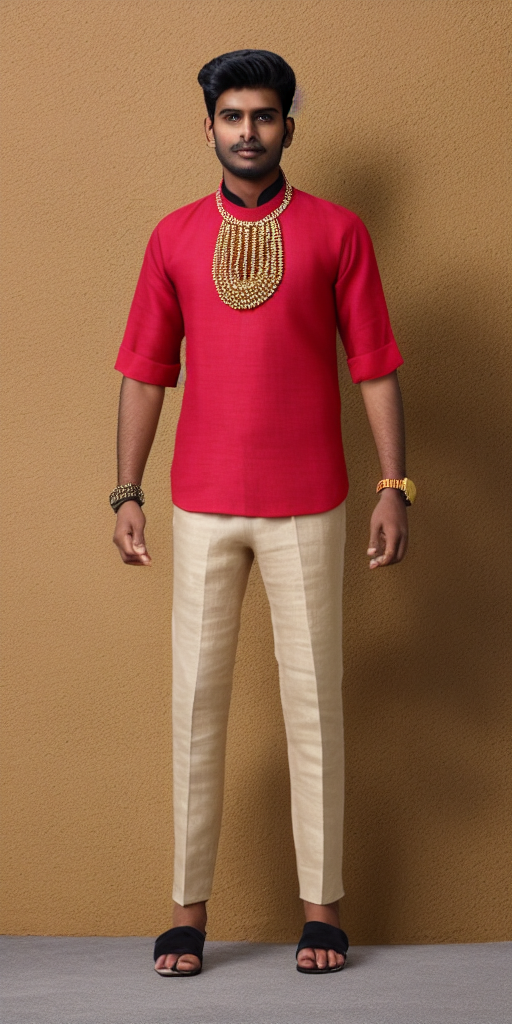

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field



if not api_key:
    print('Google API key not found in environment variables.')
    exit()

llm = ChatGoogleGenerativeAI(model="gemini-pro", api_key=api_key)

class OutfitModel(BaseModel):
    list_of_items: list[str] = Field(
        description="List of INDIVIDUAL CLOTHING ITEMS AND ACCESSORIES")

def generate_outfit_list(outfit):
    parser = PydanticOutputParser(pydantic_object=OutfitModel)
    prompt = PromptTemplate(
        template="You are an expert at forming a list of INDIVIDUAL CLOTHING ITEMS AND ACCESSORIES"
                 "Each item in the list should be searchable in an e commerce website so generate the results accordingly."
                 "FORM A LIST OF INDIVIDUAL CLOTHING ITEMS AND ACCESSORIES FOR THE GIVEN INPUT WITH DESCRIPTION"
                 "Each item in the list should be descriptive and not depend on desciption of other items."
                 "Do not give multiple options to the user. Do not include the word 'or' or any equivalent to it."
                 "\n{format_instructions}, \nInput: {input}",
        input_variables=["input"],
        partial_variables={"format_instructions": parser.get_format_instructions()})
    chain = prompt | llm | parser
    ai_response = chain.invoke({"input": outfit})
    ai_response = ai_response.list_of_items
    return ai_response

def search(outfit):
    ai_response = generate_outfit_list(outfit)
    links = []
    for i in ai_response:
        t = i.replace(" ", "%20")
        l = "https://www.flipkart.com/search?marketplace=FLIPKART&q=" + t
        links.append(l)
        print(i, l)

def generate_response(conversation_history, human_input):
    prompt = PromptTemplate(
        template="You are Drippy AI. You are a helpful assistant that recommends users OUTFIT with ACCESSORIES based upon their personalised fashion needs, gender, age, location and occasion. IF THE USER ASKS ANYTHING ELSE DENY THEM."
                 "Ask open ended questions to determine the users gender,age,location. Listen carefully to the response and take notes."
                 "Do not Include Purchase Links AND Price"
                 "GENERATE AN OUTFIT ONLY AFTER COLLECTING AGE GENDER AND LOCATION ,ONCE COMPLETED RETURN THE OUTFIT AND SPECIFY FOR WHOM THE USER'S AGE, GENDER AND LOCATION."
                 "Do not give multiple options to the user. Do not include the word 'or' or any equivalent to it."
                 "\nConversation History = {conversation_history},\nHuman Input: {human_input}",
        input_variables=["human_input", "conversation_history"],
    )
    chain = prompt | llm
    ai_response = chain.invoke({"human_input": human_input, "conversation_history": conversation_history})
    ai_response = ai_response.content
    return ai_response

def generate_image(conversation_history):
    pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

    pipe.enable_model_cpu_offload()

    pipe.enable_xformers_memory_efficient_attention()
    prompt = PromptTemplate(
        template="Generate a comprehensive prompt that is 1 para long and at the maximum 3 sentences it should less than 70 tokens to generate image of the outfit from the conversation history."
                 "Include description of the human and the outfit in detail"
                 "\Coversation Histroy: {conversation_history}",
        input_variables=["outfit"],
    )
    chain = prompt | llm
    ai_response = chain.invoke({"conversation_history": conversation_history})
    ai_response = ai_response.content
    print(ai_response)
    prompt = ai_response

    generator = torch.Generator().manual_seed(2)

    output = pipe(
        prompt,
        pose,
        negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
        num_inference_steps=20,
        generator=generator,
    )

    outputImage = output.images[0]
    outputImage
    display(outputImage)

conversation_history = []

while True:
    human_input = input("You: ")
    try:
        if human_input == "Search":
            search(conversation_history[-1]["AI"])
        elif human_input == "Show Image":
            generate_image(conversation_history)
        elif human_input == "Exit":
            exit()
        else:
            ai_response = generate_response(conversation_history, human_input)
            conversation_history.append({"Human": human_input, "AI": ai_response})
            print("AI:", ai_response)
    except Exception as e:
        print("An error occoured please try again!!", str(e))